# Antenna Array Example
The codes build a linear antenna array based on the input parameters and calculate/visulize the array radiation pattern. It can calculaet some array pattern performance parameters such as Gain, Side Lobe Level (SLL) and Half Power Beam Widrg (HPBW). 

## Array Geometry 


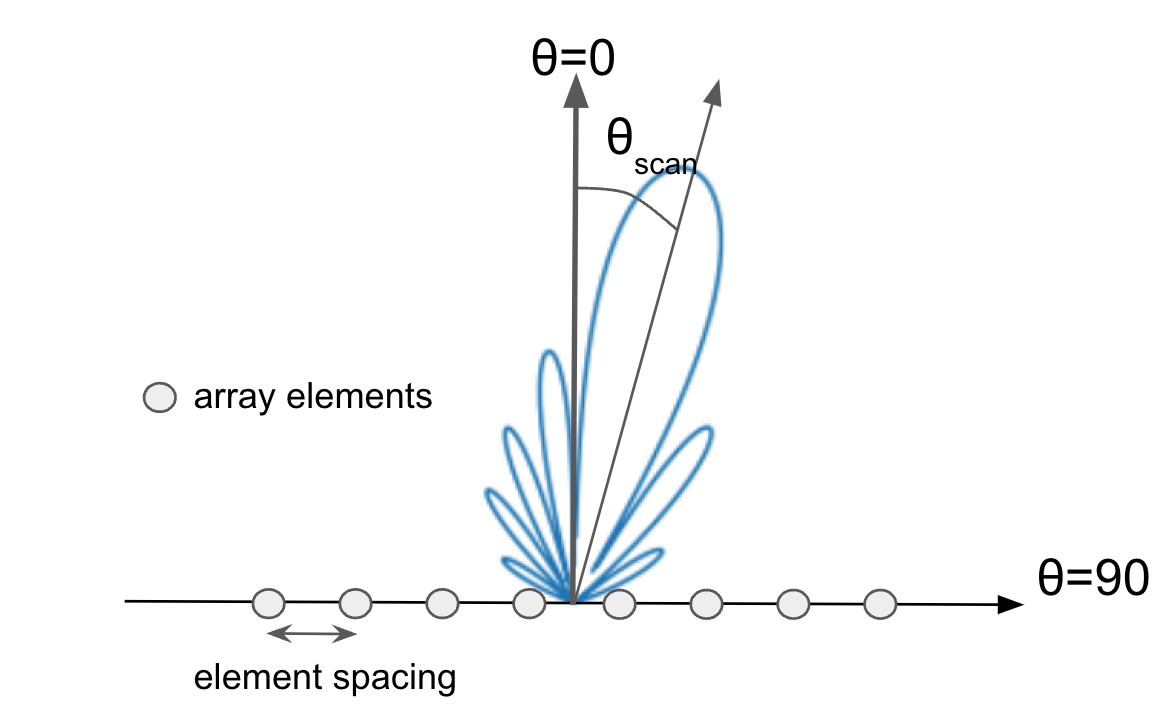

In [2]:
from IPython.display import Image
Image("img/array_geo.png",width = 600, height = 300)

Peak = 8.5dBi, theta_peak = 20.0deg, SLL = 12.3dB, HPBW = 13.0deg


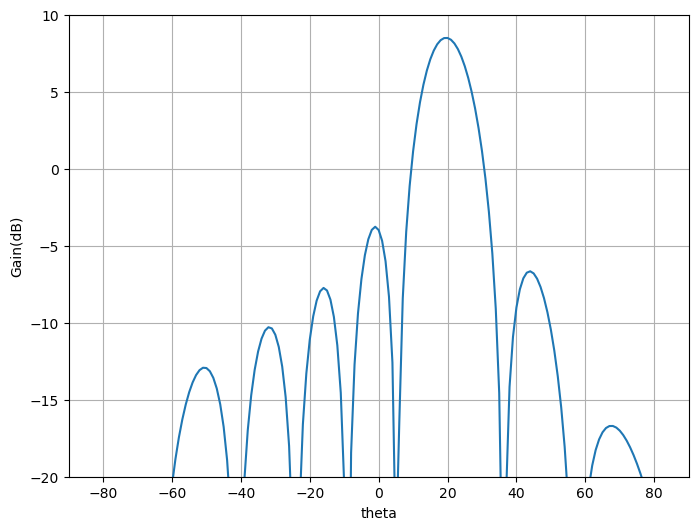

In [3]:
# calculate the pattern and parameters for a uniform linear array of 8 elements with scan angle = 20
# using linear array class
from linear_array import LinearArray

num_elem = 8 # number of array elements
element_spacing = 0.5 # in wavelength
la = LinearArray(num_elem,element_spacing,scan_angle=20,element_pattern=True) #define the linear array geometry and excitation
la.calc_AF # calculate Array Factor (Array radiation pattern)
la.plot_pattern(xlab='theta',ylab='Gain(dB)')
params = la.calc_peak_sll_hpbw_calc()
print('Peak = {:1.1f}dBi, theta_peak = {:1.1f}deg, SLL = {:1.1f}dB, HPBW = {:1.1f}deg'.format(*params))


/Users/mimfar/Google Drive/Work/antenna_array/linear_array.py:19: RuntimeWarning: divide by zero encountered in log10
  return m * np.log10(np.abs(x))


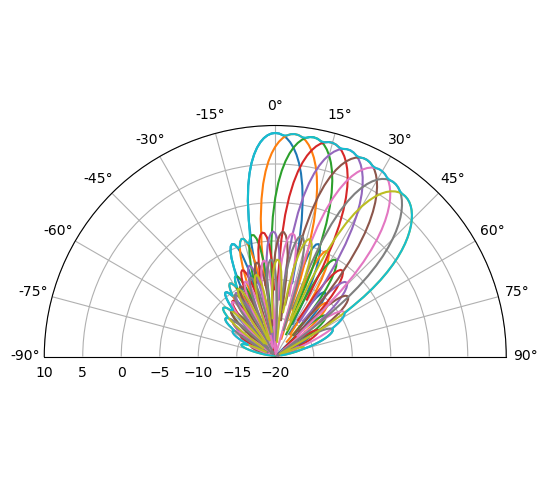

In [4]:
la.calc_envelope(theta1=0,theta2=45,delta_theta=5)
la.polar_envelope();


Peak = 13.6dBi, theta_peak = 30.0deg, SLL = 8.9dB, HPBW = 2.4deg
Peak = 14.1dBi, theta_peak = -28.0deg, SLL = 0.2dB, HPBW = 1.6deg


Text(0.5, 0, 'x(wavelength)')

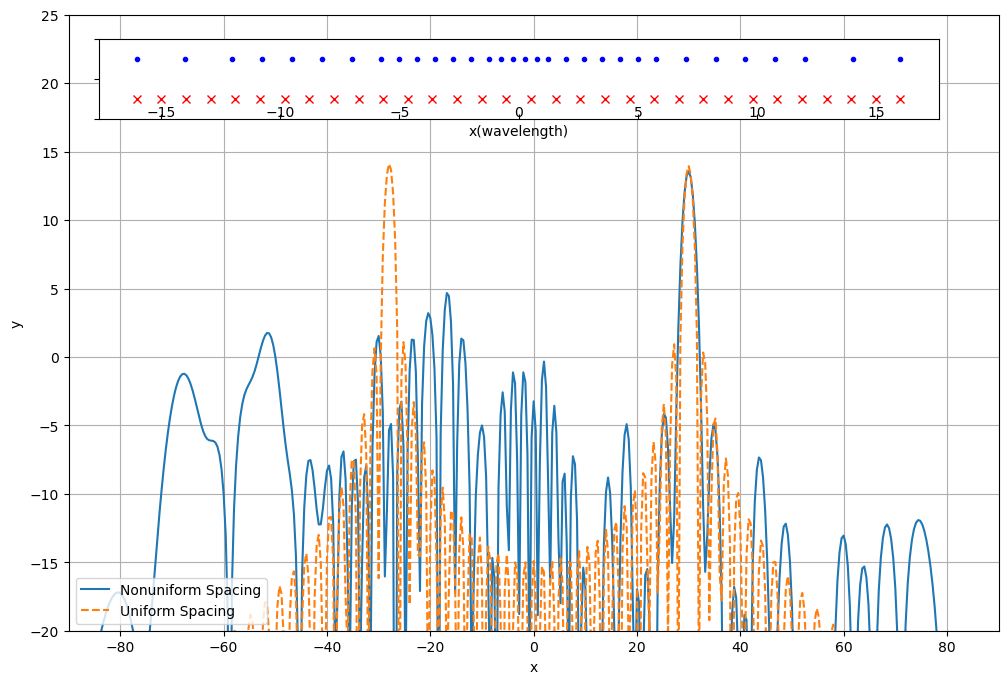

In [5]:
# Linear Array Class Example nonuniform spacing sparse array with low side lobe level
# The nonunifrom spacing removes the grating lobe
import numpy as np
import matplotlib.pyplot as plt
import random


num_elem = 32
dx = sorted(random.choices([0.5,0.75,1.25,2],k=int(num_elem/2),weights = [1, .75, 0.5, 0.5]))
element_spacing = np.hstack((np.flip(dx),dx[1:])) 
scan_angle = 30
la = LinearArray(num_elem,element_spacing,scan_angle=scan_angle)
la.calc_AF
ff = plt.figure(figsize=(12,8))
_,aa = la.plot_pattern(fig=ff,marker='-',xlim=(-90,90))
params = la.calc_peak_sll_hpbw_calc()
print('Peak = {:1.1f}dBi, theta_peak = {:1.1f}deg, SLL = {:1.1f}dB, HPBW = {:1.1f}deg'.format(*params))


element_spacing_uniform = np.mean(element_spacing)
la_uniform = LinearArray(num_elem,element_spacing_uniform,scan_angle=scan_angle)
la_uniform.calc_AF
la_uniform.plot_pattern(fig=ff,marker='--',xlim=(-90,90),ylim=(-20,25))
plt.legend(['Nonuniform Spacing','Uniform Spacing'],loc=3)
params = la_uniform.calc_peak_sll_hpbw_calc()
print('Peak = {:1.1f}dBi, theta_peak = {:1.1f}deg, SLL = {:1.1f}dB, HPBW = {:1.1f}deg'.format(*params))
## plotting the array geometry in the inset
ax_inset = ff.add_axes([0.15, 0.75, 0.7, 0.1])
ax_inset.plot(la.X,np.ones(la.X.shape),'.b')
ax_inset.plot(la_uniform.X,-np.ones(la_uniform.X.shape),'xr')
ax_inset.set_ylim(-2,2)
ax_inset.tick_params(axis="x",direction="in", pad=-10)
ax_inset.set_yticklabels('');
ax_inset.set_xlabel('x(wavelength)')

Peak = 12.0dBi, theta_peak = -0.0deg, SLL = 9.7dB, HPBW = 3.4deg


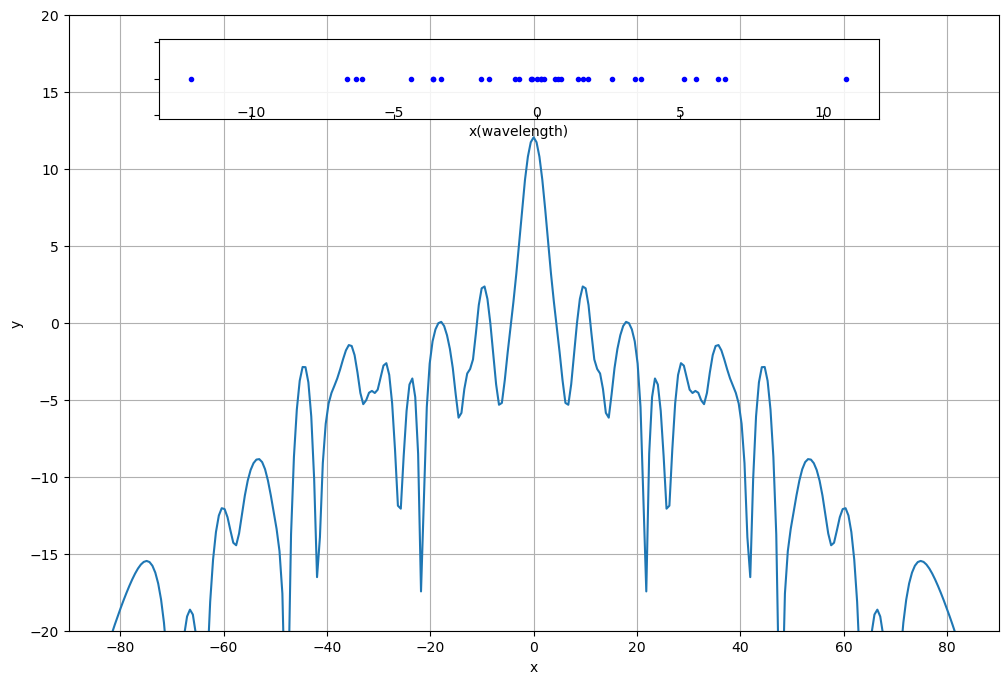

In [6]:
#%% Linear array example construct from element position
X = 4 * np.random.randn(num_elem)
la = LinearArray.from_element_position(X)
la.calc_AF
ff = plt.figure(figsize=(12,8))
_,aa = la.plot_pattern(fig=ff,marker='-',xlim=(-90,90),ylim=(-20,20))
params = la.calc_peak_sll_hpbw_calc()
print('Peak = {:1.1f}dBi, theta_peak = {:1.1f}deg, SLL = {:1.1f}dB, HPBW = {:1.1f}deg'.format(*params))
## plotting the array geometry in the inset
ax_inset = ff.add_axes([0.2, 0.75, 0.6, 0.1])
ax_inset.plot(la.X,np.zeros(la.X.shape),'.b')
ax_inset.patch.set_alpha(0.85)
ax_inset.set_yticklabels('');
ax_inset.tick_params(axis="x",direction="in", pad=-10)
ax_inset.set_yticklabels('');
ax_inset.set_xlabel('x(wavelength)');

Peak = 10.8dBi, theta_peak = 30.0deg, SLL = 12.4dB, HPBW = 7.0deg


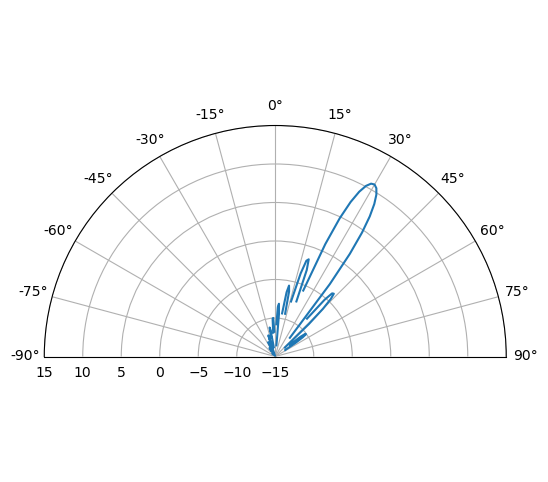

In [7]:
# calculate the pattern and parameters for a uniform linear array of 8 elements with scan angle = 20
# using antenna_array module


from antenna_array import calc_AF, calc_AF_, plot_pattern, polar_pattern ,calc_peak_sll_hpbw, db20
import numpy as np
import matplotlib.pyplot as plt
import random

num_elem = 16 # number of elements
element_spacing = 0.5 
scan_angle = 30
theta_deg,AF_linear = calc_AF(num_elem,element_spacing,scan_angle)
G = db20(AF_linear)
peak, theta_peak, SLL, HPBW = calc_peak_sll_hpbw(G, theta_deg) 
print('Peak = {:1.1f}dBi, theta_peak = {:1.1f}deg, SLL = {:1.1f}dB, HPBW = {:1.1f}deg'
      .format(peak, theta_peak, SLL, HPBW))
polar_pattern(theta_deg,G);


Peak = 10.2dBi, theta_peak = 30.0deg, SLL = 4.5dB, HPBW = 4.0deg


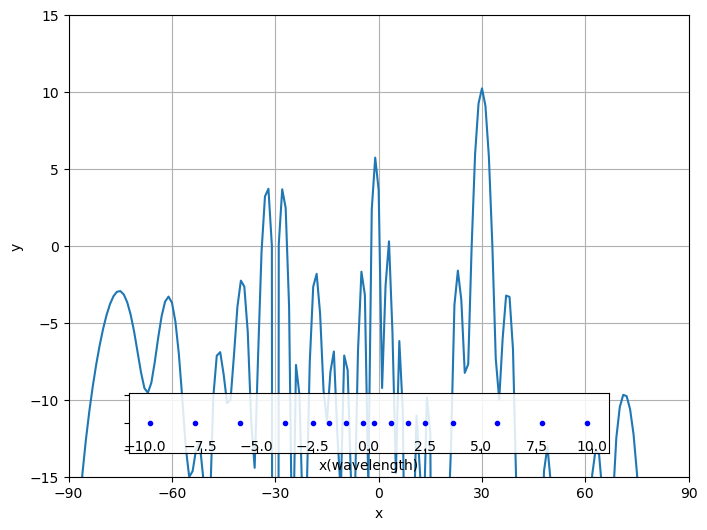

In [8]:
# An array of num_elem element with random element spacing choosen from element spacing list
num_elem = 16
dx = sorted(random.choices([0.5,0.75,1.25,2],k=int(num_elem/2),weights = [1, .75, 0.5, 0.5]))
element_spacing = np.hstack((np.flip(dx),dx[1:])) 
X = np.insert(np.cumsum(element_spacing),0,0)
X = X - np.mean(X)
P = -2 * np.pi * X * np.sin(np.radians(scan_angle))
I = np.ones(X.shape)
Nt = 181 # length of theta vectoe
theta_deg,dtheta_deg = np.linspace(-90,90,Nt,retstep = True)
theta_deg = theta_deg.reshape(Nt,1)
AF_linear = calc_AF_(X,I,P,theta_deg)
G = db20(AF_linear)
peak, theta_peak, SLL, HPBW = calc_peak_sll_hpbw(G, theta_deg) 
print('Peak = {:1.1f}dBi, theta_peak = {:1.1f}deg, SLL = {:1.1f}dB, HPBW = {:1.1f}deg'.
      format(peak, theta_peak, SLL, HPBW))
fig, ax = plot_pattern(theta_deg,G);
ax.set_xticks(np.linspace(-90,90,7));
## plotting the array geometry in the inset
ax_inset = fig.add_axes([0.2, 0.15, 0.6, 0.1])
ax_inset.plot(X,np.zeros(X.shape),'.b')
ax_inset.patch.set_alpha(0.85)
ax_inset.set_yticklabels('');
ax_inset.tick_params(axis="x",direction="in", pad=-10)
ax_inset.set_yticklabels('');
ax_inset.set_xlabel('x(wavelength)');

                Peak   SLL  HPBW
boxcar          12.0  13.2   6.5
hamming         10.7  39.7   9.5
blackman         9.7  58.5  12.0
blackmanharris   9.0  89.3  13.5


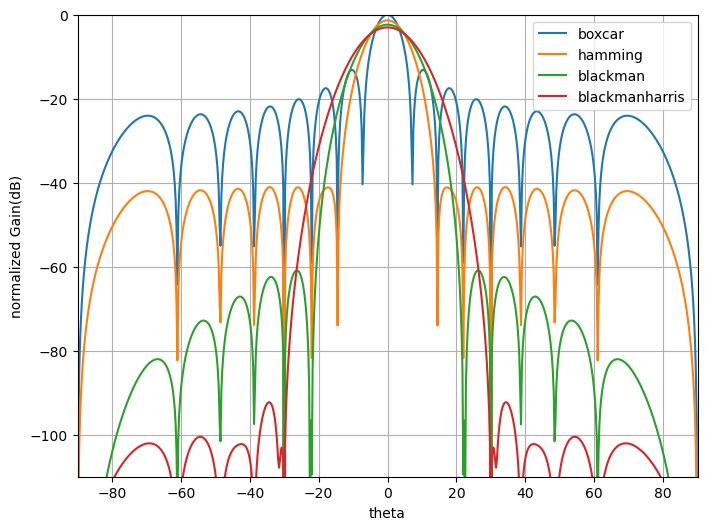

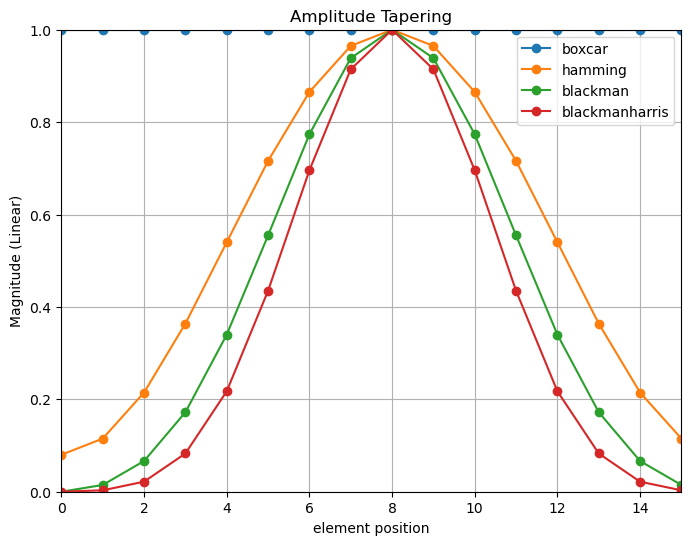

In [9]:
#%%
# An array of num_elem element with amlitude tapering / winodowing to reduce side lobe level
import pandas as pd
from scipy.signal.windows import get_window , taylor, chebwin

num_elem = 16
element_spacing = 0.5
scan_angle = 0
X = np.linspace(0,num_elem-1,num_elem) * element_spacing
P = -2 * np.pi * X * np.sin(np.radians(scan_angle))

Nt = 721 # length of theta vectoe
theta_deg,dtheta_deg = np.linspace(-90,90,Nt,retstep = True)
theta_deg = theta_deg.reshape(Nt,1)
fig, ax = plt.subplots(figsize=(8,6))
fig1, ax1 = plt.subplots(figsize=(8,6))

# based on window type
window_list = ['boxcar','hamming','blackman','blackmanharris']
df = pd.DataFrame(columns = ['Peak','SLL','HPBW'])
for window in window_list:
    I = get_window(window, num_elem)

    plt.sca(ax1) 
    plt.plot(I,'-o')

    AF_linear = calc_AF_(X,I,P,theta_deg,element_pattern=False)
    G = db20(AF_linear)
    plot_pattern(theta_deg,G-10*np.log10(num_elem),ylim=(-110,0),fig=fig,xlab='theta',ylab='normalized Gain(dB)')

    peak, theta_peak, SLL, HPBW = calc_peak_sll_hpbw(G, theta_deg)
    df.loc[window] = [peak, SLL, HPBW]


# plt.show()
plt.legend(window_list)
plt.sca(ax1) 
plt.legend(window_list)
ax1.set_xlabel('element position')
ax1.set_title('Amplitude Tapering')
ax1.set_ylabel('Magnitude (Linear)')
ax1.set_ylim(0,1)
ax1.set_xlim(0,num_elem-1)

plt.grid()
print(df.round(1))

                Peak    SLL  HPBW
boxcar          12.0   13.2   6.5
hamming         10.7   39.7   9.5
blackman         9.7   58.5  12.0
blackmanharris   9.0   89.3  13.5
20              11.9   20.1   7.0
30              11.4   30.0   8.0
40              10.9   38.9   9.0
50              10.5   50.0  10.0
70               9.9   70.0  11.0
100              9.3  100.0  13.0


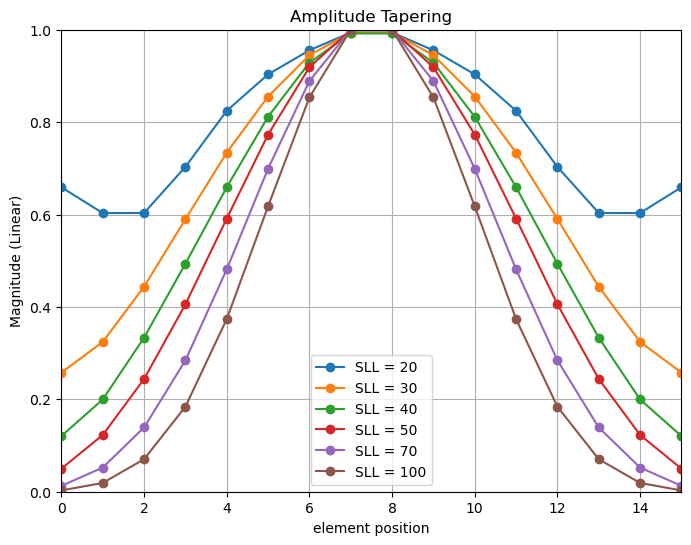

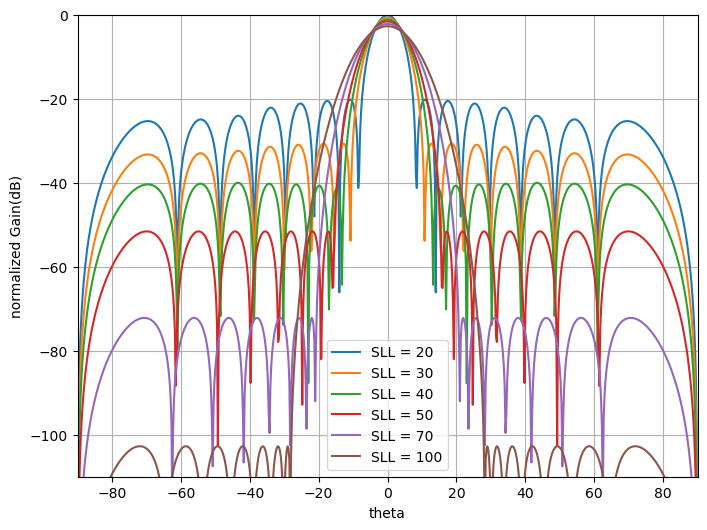

In [10]:
#based on SLL level
fig, ax = plt.subplots(figsize=(8,6))
fig1, ax1 = plt.subplots(figsize=(8,6))
SLL_list = [20,30,40,50,70,100]
for SLL_target in SLL_list:
    if SLL_target < 50:    
        I = taylor(num_elem, nbar=5, sll=SLL_target)
    else:
        I = chebwin(num_elem, SLL_target)
        
    plt.sca(ax1) 
    plt.plot(I,'-o')

    AF_linear = calc_AF_(X,I,P,theta_deg,element_pattern=False)
    G = db20(AF_linear)
    plot_pattern(theta_deg,G-10*np.log10(num_elem),ylim=(-110,0),fig=fig,xlab='theta',ylab='normalized Gain(dB)')

    peak, theta_peak, SLL, HPBW = calc_peak_sll_hpbw(G, theta_deg)
    df.loc[SLL_target] = [peak, SLL, HPBW]

print(df.round(1))
ax1.set_xlabel('element position')
ax1.set_title('Amplitude Tapering')
ax1.set_ylabel('Magnitude (Linear)')
ax1.set_ylim(0,1)
ax1.set_xlim(0,num_elem-1)
ax1.grid(True)
ax1.legend(['SLL = {}'.format(x) for x in SLL_list]);
ax.legend(['SLL = {}'.format(x) for x in SLL_list]);
ax.grid(True)


Peak = 10.3dBi, theta_peak = 0.0deg, SLL = 31.9dB, HPBW = 10.0deg
Peak = 10.3dBi, theta_peak = 0.0deg, SLL = 55.8dB, HPBW = 10.0deg


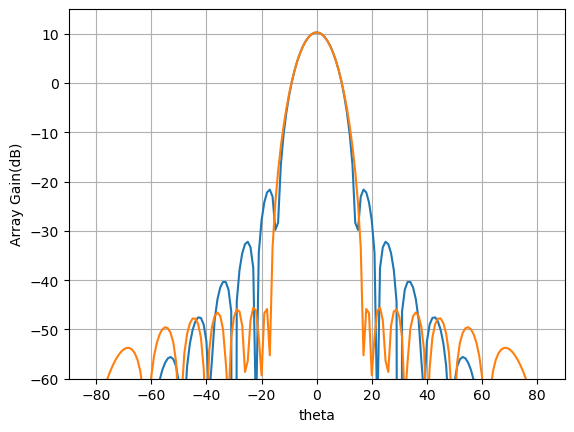

In [11]:
#%% Linear Array Class with amplitude tapering Example
from linear_array import LinearArray
num_elem = 16# number of elements
element_spacing = 0.5 
scan_angle = 0
la = LinearArray(num_elem,element_spacing,scan_angle=scan_angle,window='hann')
la.calc_AF
ff = plt.figure()
_,ax1 = la.plot_pattern(fig=ff,marker='-',xlim=(-90,90),ylim=(-60,15))
params = la.calc_peak_sll_hpbw_calc()
print('Peak = {:1.1f}dBi, theta_peak = {:1.1f}deg, SLL = {:1.1f}dB, HPBW = {:1.1f}deg'.format(*params))
la.SLL = 55
la.calc_AF
_,ax2 = la.plot_pattern(fig=ff,marker='-',xlim=(-90,90),ylim=(-60,15),xlab='theta',ylab='Array Gain(dB)')
params = la.calc_peak_sll_hpbw_calc()
print('Peak = {:1.1f}dBi, theta_peak = {:1.1f}deg, SLL = {:1.1f}dB, HPBW = {:1.1f}deg'.format(*params))

(181,)


pattern_params(Gain=23.7, Peak_Angle=29.0, SLL=24.7, HPBW=13.0)

<Figure size 640x480 with 0 Axes>

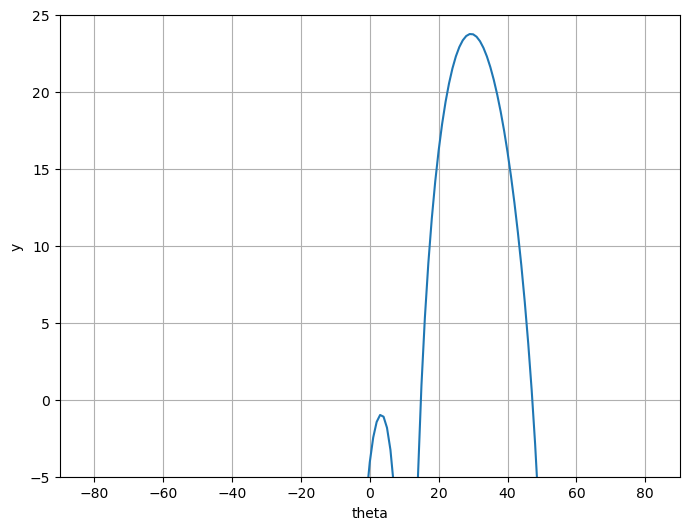

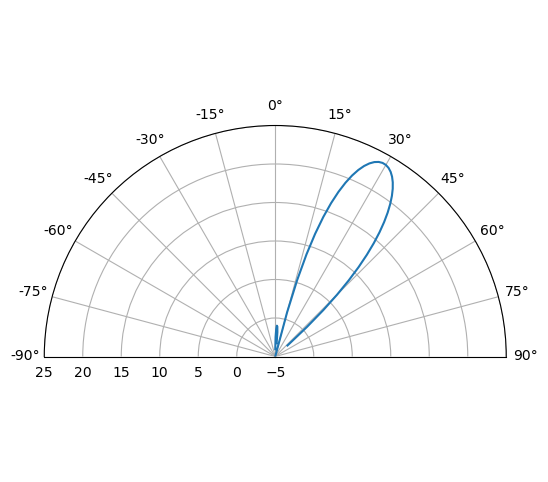

In [12]:
# planar array
from planar_array import PlanarArray
num_elem = (8,8)# number of row and col
element_spacing = (0.6,0.55) 
scan_angle = (30,45)
pa = PlanarArray(num_elem,element_spacing,scan_angle=scan_angle);
pa.calc_AF
theta_deg,G = pa.pattern_cut(scan_angle[1])
plt.figure()
pa.plot_pattern(xlim=[-90,90],xlab='theta')
pa.polar_pattern()
pa.calc_peak_sll_hpbw_calc()
pa.pattern_params